***** xtdata连接成功 2026-01-07 11:03:25*****
服务信息: {'tag': 'xtquant', 'version': '1.0'}
服务地址: 127.0.0.1:58610
数据路径: C:\data_xtdata\datadir
设置xtdata.enable_hello = False可隐藏此消息

                        time   open   high    low  close  volume  amount  \
20250327 2025-03-26 16:00:00  855.5  855.5  855.5  855.5       0     0.0   
20250328 2025-03-27 16:00:00  858.0  858.0  858.0  858.0       0     0.0   
20250331 2025-03-30 16:00:00  858.0  858.0  858.0  858.0       0     0.0   
20250401 2025-03-31 16:00:00  858.0  858.0  858.0  858.0       0     0.0   
20250402 2025-04-01 16:00:00  858.0  858.0  858.0  858.0       0     0.0   

          settelementPrice  openInterest  preClose  suspendFlag  
20250327             858.0             0     855.5            0  
20250328             858.0             0     858.0            0  
20250331             858.0             0     858.0            0  
20250401             858.0             0     858.0            0  
20250402             858.0             0

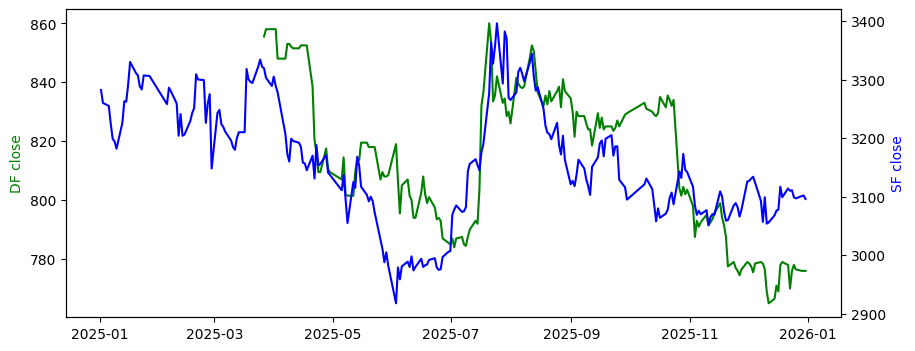

In [1]:
import pandas as pd
import numpy as np
import time
import re
import os
import sys
import draw
import backtest
from xtquant import xtdata, xtdatacenter
from datetime import datetime, timedelta
import read_xtdata
period:str="1d"
start_day:str="20250101"
end_day:str="20251231"


                        time   open   high    low  close  volume  \
20250102 2025-01-01 16:00:00  829.0  837.5  825.0  829.0   25704   
20250103 2025-01-02 16:00:00  829.0  832.0  823.0  829.0   14157   
20250106 2025-01-05 16:00:00  831.5  846.0  828.0  840.5   42290   
20250107 2025-01-06 16:00:00  839.5  849.0  836.0  848.0   35604   
20250108 2025-01-07 16:00:00  849.0  858.5  844.0  849.5   42102   

                amount  settelementPrice  openInterest  preClose  suspendFlag  
20250102  1.922703e+09             831.0         18483     827.5            0  
20250103  1.053916e+09             827.0         17173     829.0            0  
20250106  3.187990e+09             837.5         24438     829.0            0  
20250107  2.704055e+09             843.5         27689     840.5            0  
20250108  3.225143e+09             851.0         28772     848.0            0  
                        time    open    high     low   close   volume  \
20250102 2025-01-01 16:00:00  3305.0  

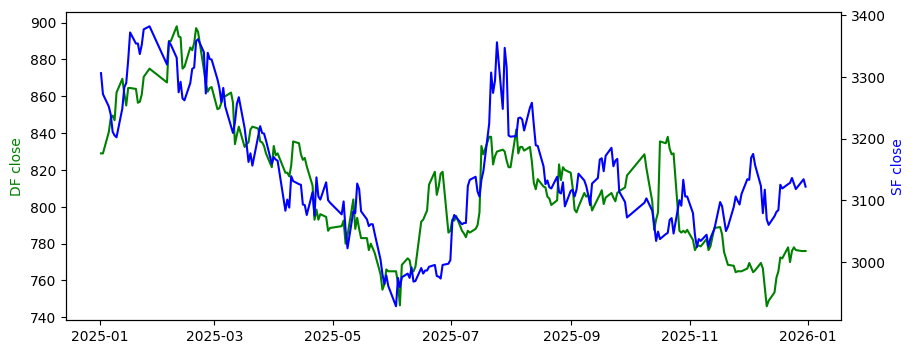

In [8]:
LG=read_xtdata.get_contract_main_date("lg00.DF",period=period,start_time=start_day,end_time=end_day)
RB=read_xtdata.get_contract_main_date("rb00.SF",period=period,start_time=start_day,end_time=end_day)
draw.draw_plot([LG,RB],x='time',y='close')

In [4]:
LG["z_return"]=backtest.zscore(LG["return"])
RB["z_return"]=backtest.zscore(RB["return"])

In [33]:
# exceed_cor:map=dict()
# for i in np.arange(-1.2,1.2,0.4):
#     x=exceedance_correlation(LG,RB,threshold=i)
#     if x is not None:
#         exceed_cor[i]=x
# print(exceed_cor)

{np.float64(-1.2): (5, np.float64(-0.9232037964589606)), np.float64(-0.7999999999999999): (8, np.float64(-0.04741494228482987)), np.float64(-0.3999999999999999): (20, np.float64(0.6862856642375675)), np.float64(2.220446049250313e-16): (53, np.float64(0.3081820876779437)), np.float64(0.40000000000000013): (25, np.float64(0.20629017068387637)), np.float64(0.8): (8, np.float64(-0.3353766060888966))}


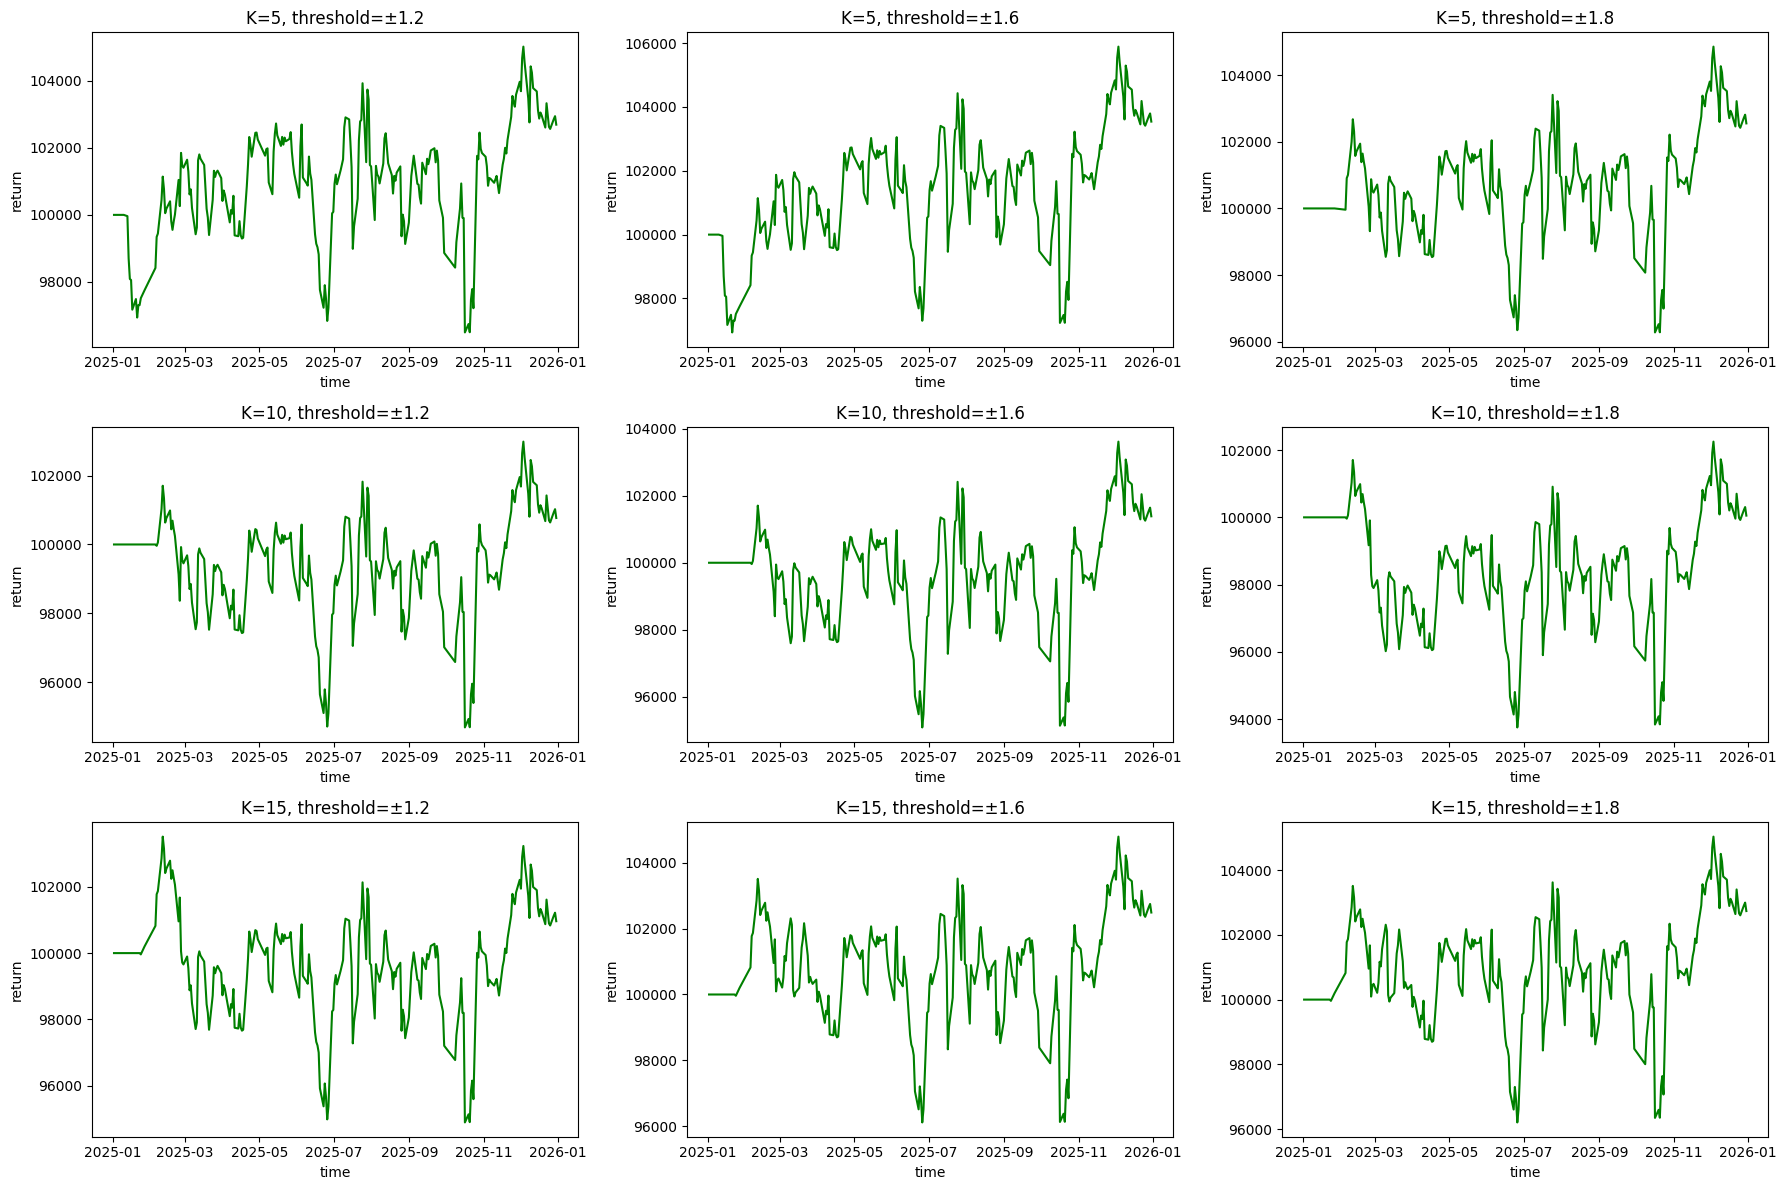

In [11]:
merged=pd.merge(LG[['time','close']],RB[['time','close']],on='time',suffixes=('_A','_B'))

import matplotlib.pyplot as plt
# for i in [10]:
#     for j in [1.2]:
#         equity=backtest.backtest(merged,entry_threshold=j,exit_threshold=-j,K=i)
#         plt.figure(figsize=(12, 4))
#         plt.plot(equity["time"], equity["equity_curve"], color='g')
#         plt.xlabel('time')
#         plt.ylabel("return")
#         plt.title('trend')
#         plt.tight_layout()
#         plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for idx, (i, j) in enumerate([(i,j) for i in [5,10,15] for j in [1.2,1.6,1.8]]):
    equity = backtest.backtest(merged, entry_threshold=j, exit_threshold=-j, K=i)
    ax = axes[idx]
    ax.plot(equity["time"], equity["equity_curve"], color='g')
    ax.set_title(f'K={i}, threshold=±{j}')
    ax.set_xlabel('time')
    ax.set_ylabel('return')
plt.tight_layout()
plt.show()

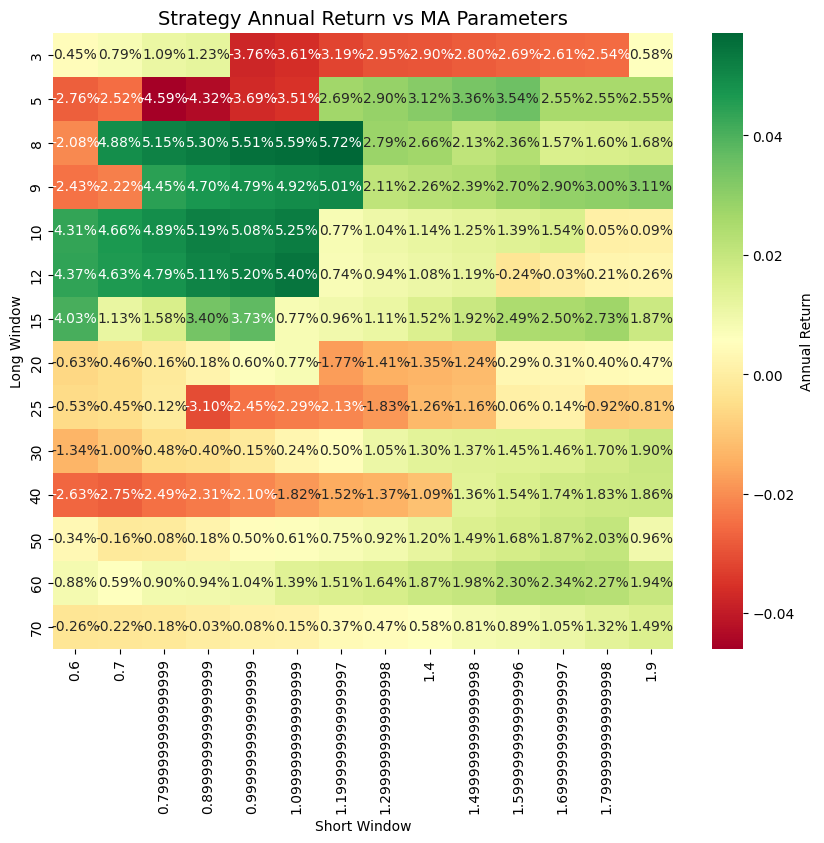

In [9]:
merged=pd.merge(LG[['time','close']],RB[['time','close']],on='time',suffixes=('_A','_B'))
K=[3,5,8,9,10,12,15,20,25,30,40,50,60,70]
threshold=np.arange(0.6,2.0,0.1)
res=[]
for k in K:
    for t in threshold:
        ret=backtest.backtest(merged,
                              entry_threshold=t,
                              exit_threshold=-t,
                              K=k
                              )
        res.append((k,t,backtest.return_simple(ret["equity_curve"])))
res_df=pd.DataFrame(res,columns=['K','threshold','return'])
draw.draw_heatmap(res_df,'K','threshold','return','Backtest Return Heatmap')
